## Cosine Similarity Calculations
Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Similarity measures have a multiude of uses in machine learning projects; they come in handy when matching strings, measuring distance, and extracting features. This similarity measurement is particularly concerned with orientation, rather than magnitude. 
In this case study, you'll use the cosine similarity to compare both a numeric data within a plane and a text dataset for string matching.

Load the Python modules, including cosine_similarity, from sklearn.metrics.pairwise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

**<font color='teal'> Load the distance dataset into a dataframe. </font>**

In [2]:
df = pd.read_csv('distance_dataset.csv', index_col=0)

In [3]:
df.head()

,X,Y,Z,ClusterID
0,5.135779,4.167542,5.787635,4
1,4.280721,5.770909,6.091044,4
2,8.329098,7.540436,3.247239,2
3,5.470224,5.069249,5.768313,4
4,2.381797,2.402374,3.879101,1


### Cosine Similarity with clusters and numeric matrices

All points in our dataset can be thought of as feature vectors. We illustrate it here as we display the __Cosine Similarity__ between each feature vector in the YZ plane and the [5, 5] vector we chose as reference. The sklearn.metrics.pairwise module provides an efficient way to compute the __cosine_similarity__ for large arrays from which we can compute the similarity.

 **<font color='teal'> First, create a 2D and a 3D matrix from the dataframe. The 2D matrix should contain the 'Y' and 'Z' columns and the 3D matrix should contain the 'X','Y', and 'Z' columns.</font>**

In [4]:
matYZ = np.array([[df.loc[i, 'Y'], df.loc[i, 'Z']] for i in range(len(df))])
mat = np.array([[df.loc[i, 'X'], df.loc[i, 'Y'], df.loc[i, 'Z']] for i in range(len(df))])

Calculate the cosine similarity for those matrices with reference planes of 5,5 and 5,5,5. Then subtract those measures from 1 in new features.

In [5]:
simCosine3D = 1. - cosine_similarity(mat, [[5,5,5]], 'cosine')
simCosine = 1. - cosine_similarity(matYZ, [[5,5]], 'cosine')

Using the 2D matrix and the reference plane of (5,5) we can use a scatter plot to view the way the similarity is calculated using the Cosine angle.

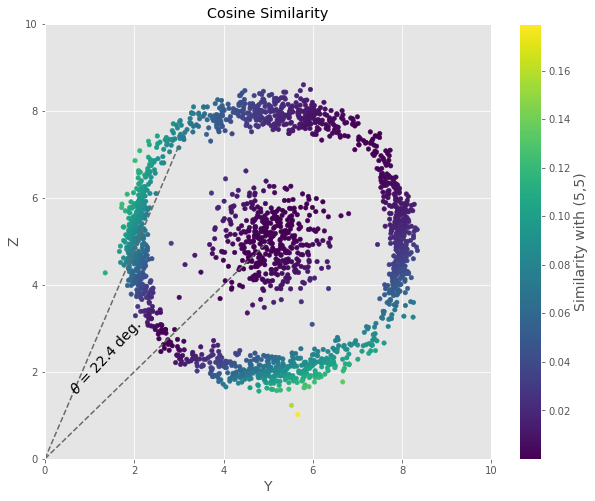

In [6]:
figCosine = plt.figure(figsize=[10,8])

plt.scatter(df.Y, df.Z, c=simCosine[:,0], s=20)
plt.plot([0,5],[0,5], '--', color='dimgray')
plt.plot([0,3],[0,7.2], '--', color='dimgray')
plt.text(0.5,1.5,r'$\theta$ = 22.4 deg.', rotation=47, size=14)
plt.ylim([0,10])
plt.xlim([0,10])
plt.xlabel('Y', size=14)
plt.ylabel('Z', size=14)
plt.title('Cosine Similarity')
cb = plt.colorbar()
cb.set_label('Similarity with (5,5)', size=14)

#figCosine.savefig('similarity-cosine.png')

Now, plot the 3D matrix with the similarity and the reference plane, (5,5,5).

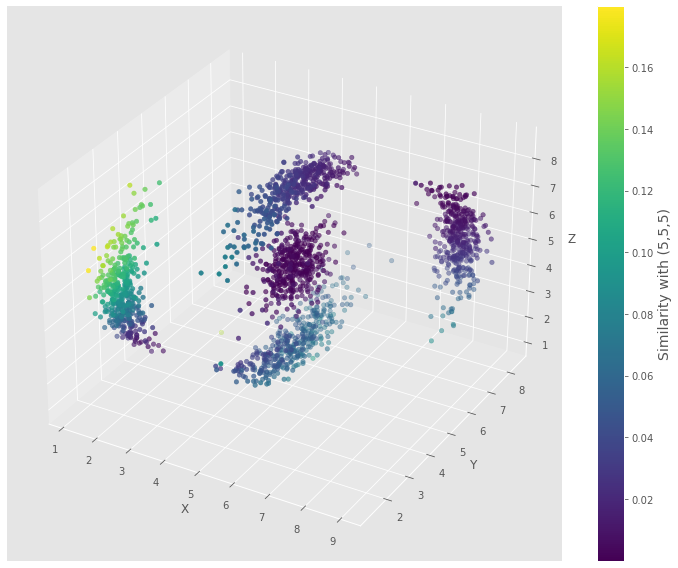

In [7]:
from mpl_toolkits.mplot3d import Axes3D
figCosine3D = plt.figure(figsize=(10, 8))
ax = figCosine3D.add_subplot(111, projection='3d')

p = ax.scatter(mat[:,0], mat[:,1], mat[:,2], c=simCosine3D[:,0])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
cb = figCosine3D.colorbar(p)
cb.set_label('Similarity with (5,5,5)', size=14)
                                   
figCosine3D.tight_layout()
#figCosine3D.savefig('cosine-3D.png', dpi=300, transparent=True)

----

### Cosine Similarity with text data
This is a quick example of how you can use Cosine Similarity to compare different text values or names for record matching or other natural language proecessing needs. 
First, we use count vectorizer to create a vector for each unique word in our Document 0 and Document 1. 

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
Document1 = "Starbucks Coffee"
Document2 = "Essence of Coffee"

corpus = [Document1,Document2]

X_train_counts = count_vect.fit_transform(corpus)

pd.DataFrame(X_train_counts.toarray(),columns=count_vect.get_feature_names(),index=['Document 0','Document 1'])

,coffee,essence,of,starbucks
Document 0,1,0,0,1
Document 1,1,1,1,0


Now, we use a common frequency tool called TF-IDF to convert the vectors to unique measures.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
trsfm=vectorizer.fit_transform(corpus)
pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names(),index=['Document 0','Document 1'])

,coffee,essence,of,starbucks
Document 0,0.579739,0.000000,0.000000,0.814802
Document 1,0.449436,0.631667,0.631667,0.000000


Here, we finally apply the __Cosine Similarity__ measure to calculate how similar Document 0 is compared to any other document in the corpus. Therefore, the first value of 1 is showing that the Document 0 is 100% similar to Document 0 and 0.26055576 is the similarity measure between Document 0 and Document 1.

In [10]:
cosine_similarity(trsfm[0:1], trsfm)

array([[1.        , 0.26055567]])

Replace the current values for `Document 0` and `Document 1` with your own sentence or paragraph and apply the same steps as we did in the above example.

 **<font color='teal'> Combine the documents into a corpus.</font>**

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
#First 3 paragraphs of The Raven by Edgar Allen Poe
doc1 = "Once upon a midnight dreary, while I pondered, weak and weary, \nOver many a quaint and curious volume of forgotten lore—\nWhile I nodded, nearly napping, suddenly there came a tapping,\nAs of some one gently rapping, rapping at my chamber door.\n'’Tis some visitor,' I muttered, 'tapping at my chamber door—\nOnly this and nothing more.'\n\nAh, distinctly I remember it was in the bleak December;\nAnd each separate dying ember wrought its ghost upon the floor.\nEagerly I wished the morrow;—vainly I had sought to borrow\nFrom my books surcease of sorrow—sorrow for the lost Lenore—\nFor the rare and radiant maiden whom the angels name Lenore—\nNameless here for evermore.\n\nAnd the silken, sad, uncertain rustling of each purple curtain\nThrilled me—filled me with fantastic terrors never felt before;\nSo that now, to still the beating of my heart, I stood repeating\n'’Tis some visitor entreating entrance at my chamber door—\nSome late visitor entreating entrance at my chamber door;—\nThis it is and nothing more.'"
#First paragraph of Moby Dick by Herman Melville
doc2 = "Call me Ishmael. Some years ago—never mind how long precisely—having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world. It is a way I have of driving off the spleen and regulating the circulation. Whenever I find myself growing grim about the mouth; whenever it is a damp, drizzly November in my soul; whenever I find myself involuntarily pausing before coffin warehouses, and bringing up the rear of every funeral I meet; and especially whenever my hypos get such an upper hand of me, that it requires a strong moral principle to prevent me from deliberately stepping into the street, and methodically knocking people’s hats off—then, I account it high time tozz get to sea as soon as I can. This is my substitute for pistol and ball. With a philosophical flourish Cato throws himself upon his sword; I quietly take to the ship. There is nothing surprising in this. If they but knew it, almost all men in their degree, some time or other, cherish very nearly the same feelings towards the ocean with me."
#Last 3 paragraphs of The Raven by Edgar Allen Poe
doc3 = "'Prophet!' said I, 'thing of evil!—prophet still, if bird or devil!\nBy that Heaven that bends above us—by that God we both adore—\nTell this soul with sorrow laden if, within the distant Aidenn,\nIt shall clasp a sainted maiden whom the angels name Lenore—\nClasp a rare and radiant maiden whom the angels name Lenore.'\nQuoth the Raven 'Nevermore.'\n\n'Be that word our sign of parting, bird or fiend!' I shrieked, upstarting—\n'Get thee back into the tempest and the Night’s Plutonian shore!\nLeave no black plume as a token of that lie thy soul hath spoken!\nLeave my loneliness unbroken!—quit the bust above my door!\nTake thy beak from out my heart, and take thy form from off my door!'\nQuoth the Raven 'Nevermore.'\n\nAnd the Raven, never flitting, still is sitting, still is sitting\nOn the pallid bust of Pallas just above my chamber door;\nAnd his eyes have all the seeming of a demon’s that is dreaming,\nAnd the lamp-light o’er him streaming throws his shadow on the floor;\nAnd my soul from out that shadow that lies floating on the floor\nShall be lifted—nevermore!"

corpus = [doc1, doc2, doc3]

 **<font color='teal'> Apply the count vectorizer to the corpus to transform it into vectors.</font>**

In [12]:
X_train_counts = count_vect.fit_transform(corpus)

 **<font color='teal'> Convert the vector counts to a dataframe with Pandas.</font>**

In [13]:
pd.DataFrame(X_train_counts.toarray(), columns=count_vect.get_feature_names(), index=['Raven First', 'Moby Dick', 'Raven Last'])

,about,above,account,adore,ago,ah,aidenn,all,almost,an,...,while,whom,wished,with,within,word,world,would,wrought,years
Raven First,0,0,0,0,0,1,0,0,0,0,...,2,1,1,1,0,0,0,0,1,0
Moby Dick,2,0,1,0,1,0,0,1,1,1,...,0,0,0,2,0,0,1,1,0,1
Raven Last,0,3,0,1,0,0,1,1,0,0,...,0,2,0,1,1,1,0,0,0,0


 **<font color='teal'> Apply TF-IDF to convert the vectors to unique frequency measures.</font>**

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
trnfm = vectorizer.fit_transform(corpus)
pd.DataFrame(trnfm.toarray(), columns=vectorizer.get_feature_names(), index=['Raven First', 'Moby Dick', 'Raven Last'])

,about,above,account,adore,ago,ah,aidenn,all,almost,an,...,while,whom,wished,with,within,word,world,would,wrought,years
Raven First,0.000000,0.000000,0.000000,0.000000,0.000000,0.064557,0.000000,0.000000,0.000000,0.000000,...,0.129113,0.049097,0.064557,0.038128,0.000000,0.000000,0.000000,0.000000,0.064557,0.000000
Moby Dick,0.123217,0.000000,0.061608,0.000000,0.061608,0.000000,0.000000,0.046855,0.061608,0.061608,...,0.000000,0.000000,0.000000,0.072774,0.000000,0.000000,0.061608,0.061608,0.000000,0.061608
Raven Last,0.000000,0.165504,0.000000,0.055168,0.000000,0.000000,0.055168,0.041957,0.000000,0.000000,...,0.000000,0.083914,0.000000,0.032583,0.055168,0.055168,0.000000,0.000000,0.000000,0.000000


 **<font color='teal'> Use the cosine similarity function to get measures of similarity for the sentences or paragraphs in your original document.</font>**

In [15]:
cosine_similarity(trnfm, trnfm)

array([[1.        , 0.37131634, 0.38016583],
       [0.37131634, 1.        , 0.368854  ],
       [0.38016583, 0.368854  , 1.        ]])

The Raven excerpts are the most similar, as expected. Then Moby Dick with the first 3 paragraphs of The Raven, followed by Moby Dick and the last 3 paragraphs of The Raven.